<a href="https://colab.research.google.com/github/rvidals/AnaliseExploratoria_Estabelecimento_SalasVacinacao_CNES/blob/main/AnaliseExploratoria_SalaImunizacao_GrupoStatus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import files

In [ ]:
files.upload()

In [ ]:
salas = pd.read_csv('/content/BASE_TRATADA_AC_SALAS_VACINACAO.csv', 
                    sep=';', 
                    encoding='latin')

In [ ]:
qtd_salas_status = salas.groupby('STATUS_LOC').agg(QTD=('STATUS_LOC', 'count')).reset_index()


In [ ]:
qtd_salas_status

,STATUS_LOC,QTD
0,0,9
1,1,15
2,2,21


In [ ]:
# Criação da columna Legenda e inserção dos valores 
qtd_salas_status['Legenda'] = ['Não identificados' if x == 0 else 'Localização correta' if x == 1 else 'Localização corrigida' for x in qtd_salas_status['STATUS_LOC']]

In [ ]:
qtd_salas_status

,STATUS_LOC,QTD,Legenda
0,0,9,Não identificados
1,1,15,Localização correta
2,2,21,Localização corrigida


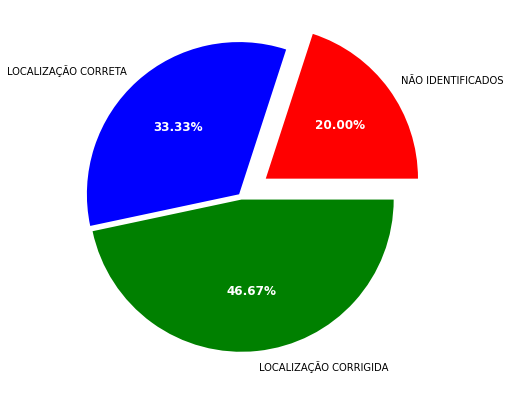

In [ ]:
#Geração do gráfico de pizza

#Tamanho do gáfico
fig = plt.figure(figsize = (10,7))

#cores 
colors = ['red', 'blue', 'green']

# Parâmetros de espaçamento
explode = (0.2, 0.02, 0.02)

#Parâmetros do gráfico
_, _, autotexts = plt.pie(qtd_salas_status['QTD'], 
        explode = explode,
        colors = colors,
        autopct='%1.2f%%',
        labels = qtd_salas_status['Legenda'].str.upper(),
        )

#Coloração do texto no interior do gráfico
for autotext in autotexts:
  autotext.set_color('White')

#Parâmetros do tamanho do texto no interior do gráfico
plt.setp(autotexts, size=12, weight="bold")

#Salvando gráfico 
#Importante: Primeiro salve e depois printa!
plt.savefig('Gráfico de Pizza - Salas de Imunização.png')
#Apresentar o gráfico
plt.show()
